<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Simulación matemática. 

**Nombres:** Daniel Hernandez Vila. Talpa de Jesús Ornelas Güitrón

**Fecha:** 02 de octubre del 2023.

**Expediente** : 728962. 745134.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Daniel-Iteso/Tarea5-6_HernandezDanielOrnelasTalpa

# Tarea 6: Clase 10

## Enunciado de tarea (Transcibirlo)
> 1. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 1, 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$


$$[x^2+2y^2\leq-2x+8y-7] = [\frac{1}{2}(x+1)^2+(y-2)^2 \leq1]$$

Al solucionarlo mediante el uso de un solver se observa que la figura tiene sus vertices en:
$$-1-\sqrt{2}<x<\sqrt{2}-1$$
$$1\leq y\leq3$$
Con el centro en: 
$$(-1,2)$$

Es por ello que los limites seleccionados son [-3,0] y [1,4] con un area de:
$$a=\pi*r_1*r_2$$
$$a=\pi*\sqrt{2}*1$$
$$a\approx4.4429$$

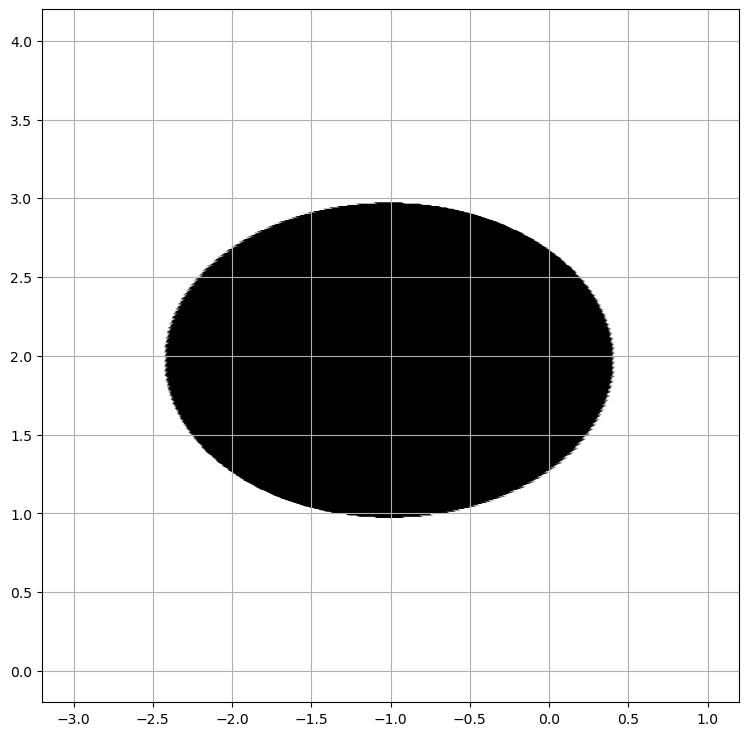

,Aproximación,Error
1,0.0,100.000000
10,3.6,18.971532
100,3.78,14.920108
1000,3.888,12.489254
10000,4.0635,8.539116
100000,4.0302,9.288630


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def m2(reg, a1, b1, a2, b2, N):
    AR = (b1-a1)*(b2-a2)
    x = np.random.uniform(a1, b1, N)
    y = np.random.uniform(a2, b2, N)
    bi = reg(x, y)
    AD_approx = AR*np.mean(bi)
    return AD_approx

def reg(x, y):
    return x**2 + 2*y**2 <= -2*x + 8*y - 7

xnum = np.linspace(-3, 1, 500)
ynum = np.linspace(0, 4, 500)

X, Y = np.meshgrid(xnum, ynum)

plt.figure(figsize=(9, 9))

plt.scatter(X, Y, c=~reg(X,Y), cmap='bone') 

plt.grid()
plt.show()

a1, b1, a2, b2 = -3, 0, 1, 4

N = np.logspace(0, 5, 6).astype(int)

tabla = pd.DataFrame(index = N, columns=['Aproximación'])


for n in N:
    area_aprox = m2(reg, a1, b1, a2, b2, n)
    tabla.loc[n, 'Aproximación'] = area_aprox
    tabla.loc[n, 'Error'] = 100*np.abs(area_aprox - (np.pi*np.sqrt(2)))/(np.pi*np.sqrt(2))

tabla

Código de solución estudiante 1

In [6]:
#Código de solución estudiante 1
import numpy as np
import pandas as pd

# Función f(x)=log_10(2x)+8^x
def f1(x):
    return np.log10(2*x) + 8**x

# Función f(x)=(2^x)/(x^4)
def f2(x):
    return((2**x)/(x**4))

In [7]:
def montecarlo1(f, a, b, N):
    # Generar N puntos uniformemente distribudos en el intervalo [a,b)
    ui = np.random.uniform(a, b, N)
    
    # Evaluar la función en los N puntos aleatorios, obtener el promedio y multiplicarlo por el intervalo
    integral = ((b-a)/N)*np.sum(f(ui))
    # integral = (b-a)*np.mean(f(ui))   Esta línea es equivalente a la anterior
    return integral

# Definimos cantidades de terminos
N = np.logspace(0, 5, 6).astype(int)

# Crear el DataFrame de pandas (tabla) que contendrá la información
tabla2 = pd.DataFrame(index=N, columns = ['Aprox f1', 'Aprox f2'])


# Agregar nombre al índice para que aprezca en la tabla
tabla2.index.name = 'Cantidad de términos'
a, b = 1, 5
# Rellenar las celdas de la aproximación de cada función
for n in N:
    aprox_f = montecarlo1(f1, a, b, n)
    aprox_g = montecarlo1(f2, a, b, n)
    
    tabla2.loc[n, 'Aprox f1'] = aprox_f
    tabla2.loc[n, 'Aprox f2'] = aprox_g
     
    
tabla2

,Aprox f1,Aprox f2
Cantidad de términos,,
1,9486.568217,1.977327
10,17771.557729,1.507473
100,17278.232668,0.990294
1000,14258.281999,0.97817
10000,15673.519703,1.019121
100000,15767.33837,1.023624


Código de solución estudiante 2

In [33]:
# Código de solución estudiante 2
import numpy as np
import pandas as pd

def m1(f, a, b, N):
    ui = np.random.uniform(a, b, N)
    integral = ((b-a)/N)*np.sum(f(ui))
    return integral

def in1(x):
    return np.log10(2*x)+8**x

def in2(x):
    return 2**x/x**4

a, b = 1, 5

Aprox = np.logspace(1, 5, 5).astype(int)

tabla = pd.DataFrame(index=N, columns = ['Aprox MC1', 'Aprox MC2'])

tabla.index.name = 'Cantidad de términos'

for cont in Aprox:
    aprox_MC1 = m1(in1, a, b, cont)
    aprox_MC2 = m1(in2, a, b, cont)
    
    tabla.loc[cont, 'Aprox MC1'] = aprox_MC1
    tabla.loc[cont, 'Aprox MC2'] = aprox_MC2
    
tabla

,Aprox MC1,Aprox MC2
Cantidad de términos,,
10,23273.538216,1.614808
100,13619.972772,1.026792
1000,16246.592205,1.08026
10000,16015.857708,0.99506
100000,15770.545918,1.013538


### Respuesta planteada en el ejercicio usando (markdown) estudiante 1
 La aploximacion con la integracion montecarlo unando terminos desde 10 a 100000 nos obtiene un valor aproximado.
 
 Para la integral 1:
 $$\int_{1}^{5}\log_{10}(2x)+8^x\text{d}x=15767.33837$$
 Para la integral 2:
 $$\int_{1}^{5}\frac{2^x}{x^4}\text{d}x=1.023624$$
 
 Si comprobamos nuestros resultados con una integral definida:
 
 $$\int_{1}^{5}\log_{10}(2x)+8^x\text{d}x=15757.191638584207$$
 $$\int_{1}^{5}\frac{2^x}{x^4}\text{d}x=1.0093064153618818$$
 
 Por lo que se observa una buena aproximación con un error a cuatro decimales de:

$$\frac{15767.3383-15757.1916}{15767.3383}*100 \approx 0.0643\%$$

Y para el segundo problema

$$\frac{1.0236-1.0093}{1.0236}*100 \approx 1.3970\%$$

### Respuesta planteada en el ejercicio usando (markdown) estudiante 2

Realizando la proximación de Montecarlo en su priemra forma con divisiones entre 10 y 100000 se obtiene que el valor aproximado de la integral es: 

$$\int_{1}^{5} \log_{10}(2x)+8^x\text{d}x = 15770.1370$$

Y para la segunda integral el valor es:

$$\int_1^5 \frac{2^x}{x^4} \text{d}x = 1.0069$$

Dichos valores se comprobaron con el solver "WolframAlpha" obteniendo una buena aproximación:

$$\int_{1}^{5} \log_{10}(2x)+8^x\text{d}x \approx 15757$$

$$\int_{1}^{5} \log_{10}(2x)+8^x\text{d}x = 1.0093$$

Por lo que se observa una buena aproximación con un error a cuatro decimales de:

$$\frac{15770.1370-15757}{15770.1370}*100 \approx 0.0830\%$$

Y para el segundo problema

$$\frac{1.0093-1.0069}{1.0069}*100 \approx 0.2384\%$$

## SE DEBE ACLARAR QUE CADA VEZ QUE SE CORRE EL PROGRAMA AL TENER DISTINTA SEMILLA DEBIDO AL TIEMPO DE LA COMPUTADORA, LOS VALORES OBTENIDOS Y COMPARADOS FUERON DE LA PRIMERA CORRIDA REALIZADA